In [1]:
import numpy as np
import matplotlib.pyplot as plt
import beaconsHelper
import trilateration
import CoreLocation

In [2]:
label = "onepoint-13-vertical"
data = beaconsHelper.load_rssi_data(label)

In [3]:
data_by_id = {}
rssi_data_by_timestamp = beaconsHelper.get_rssi_data_by_timestamp(data, rssi_thres=-65)
print(len(rssi_data_by_timestamp.keys()))

402


### Average prediction over 1 minute

In [4]:
for beacon_id in range(1, 10):
    ibeacon = beaconsHelper.get_rssi_data_from_id(beacon_id, rssi_data_by_timestamp)
#     print ibeacon
    ibeacon = beaconsHelper.get_smooth_rssi_data(ibeacon, 5, option="median")
#     print "\n\n\n",ibeacon
    data_by_id[beacon_id] = ibeacon
data_by_timestamp = beaconsHelper.convert_rssi_data_by_id_to_timestamp(data_by_id)
data_by_timestamp = beaconsHelper.convert_to_rough_timestamp(data_by_timestamp)
# print(list(sorted(data_by_timestamp.keys())))

Locs_james: [1526270348.0: (64.38370094868989, 135.3654867217715), 1526270350.0: (165.90091032112633, 138.8859784146113), 1526270351.0: (141.30659779975912, 211.12308145981902), 1526270352.0: (88.32243242120686, 178.62836500929464), 1526270353.0: (122.56610879311603, 126.27370750494637), 1526270356.0: (133.70679170704278, 132.94364479968374), 1526270357.0: (154.56472507616178, 133.67039765920643), 1526270358.0: (113.03219197400946, 144.66293974808545), 1526270359.0: (65.05769045717862, 132.7753140157779), 1526270362.0: (30.823602778922137, 159.02473099601363), 1526270363.0: (79.2579995371011, 85.4574915076945), 1526270364.0: (65.59045741627638, 135.1940076667813), 1526270365.0: (113.71826572419653, 161.77627103648177), 1526270366.0: (123.79746927371933, 101.27952300480233), 1526270367.0: (132.31587539956803, 140.17269681710962), 1526270368.0: (67.6266133071475, 127.41759650651655), 1526270369.0: (65.60928835582561, 129.31474069162846), 1526270370.0: (98.05535279249662, 136.003381591174

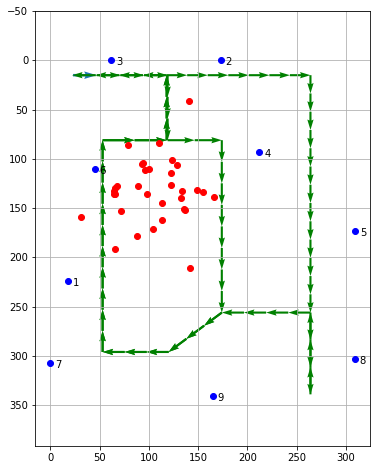

In [5]:
conversion = 39.97 # meters to inches
A = -64
n = 2

subject_name = "james"
room = CoreLocation.Room.import_room_data('room_measurement.json', "G5-may13")
beacon_locations = room.beacons.get_dict_by_label()
predicted_locations = CoreLocation.Locations(subject=subject_name)
xs, ys = zip(*beacon_locations.values())
margin = 50
axis_limits = [min(xs) - margin, max(xs) + margin, min(ys) - margin, max(ys) + margin]
# print data_by_timestamp
sorted_timestamps = list(sorted(data_by_timestamp.keys()))
# print(sorted_timestamps)
for timestamp in sorted_timestamps:
# for timestamp in data_by_timestam.
    rssi_values = beaconsHelper.get_rssi_values(data_by_timestamp, timestamp)
    beacon_distances = beaconsHelper.get_beacon_distances_from_rssi(rssi_values, A, n, conversion)
#     predicted_loc = trilateration.trilaterate_ratios(beacon_locations, beacon_distances)
    predicted_loc = trilateration.trilaterate(beacon_locations, beacon_distances, L2=True)

    # TODO: check why None result from trilateration
    if predicted_loc is not None:
        predicted_locations.add_np_point(predicted_loc, timestamp)
print(predicted_locations)
room.plot_with_groundtruth(predicted_locations)

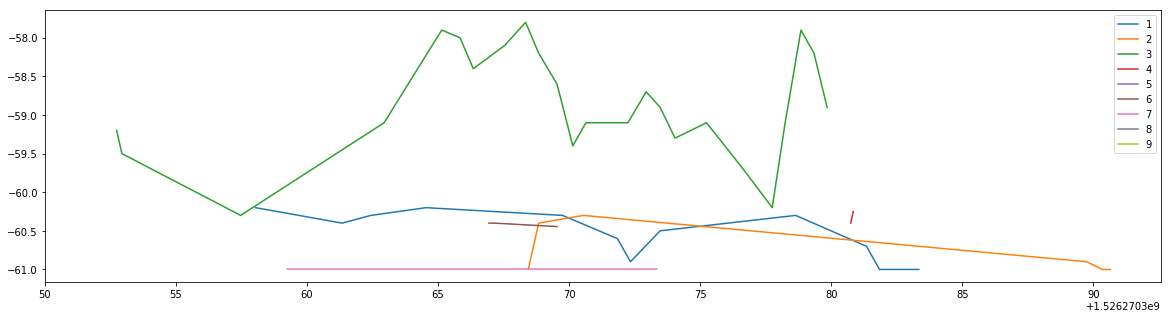

In [6]:
plt.figure(figsize=(20,5))
rssi_data_by_timestamp = beaconsHelper.get_rssi_data_by_timestamp(data, rssi_thres=-61)
for beacon_id in range(1, 10):
    ibeacon = beaconsHelper.get_rssi_data_from_id(beacon_id, rssi_data_by_timestamp)
    ibeacon = beaconsHelper.get_smooth_rssi_data(ibeacon, 5, option="average")
    ibeacon_timestamps = list(map(lambda ib: ib.timestamp, ibeacon))
    ibeacon_rssis = list(map(lambda ib: ib.rssi, ibeacon))

    plt.plot(ibeacon_timestamps, ibeacon_rssis, label=beacon_id)
plt.legend()
plt.show()
